<a href="https://colab.research.google.com/github/adapateja/Machine-learning/blob/main/Book_ml.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing neccesary libraries 

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#SHOWING THE DATA

reading the csv file

In [ ]:
book_data=pd.read_csv("/content/book_levels.csv")

showing sample of the dataset

In [ ]:
book_data.sample(5)

,Title,Author,Language Level
43,Curious George,H.A. Rey,level_4a
215,Farewell to Manzanar,"Jeanne Wakatsuki Houston,& James D. Houston",level_I
30,Chicka Chicka Boom Boom,"Bill Martin Jr. and, John Archambault",level_5a
212,archy and mehitabel,Don Marquis,level_I
49,A House is a House for Me,Mary Ann Hoberman,level_4a


#DATA PREPROCESSING and Analysis

In [ ]:
#Knowing the shape
book_data.shape

(236, 3)

In [ ]:
#knoew the column names
book_data.columns

Index(['Title', 'Author', 'Language Level'], dtype='object')

In [ ]:
#Describing the data
book_data.describe()

,Title,Author,Language Level
count,236,236,236
unique,236,203,14
top,Hop on Pop,Dr. Seuss,level_6a
freq,1,4,28


From the above data we can tell that there are total 236 unique titiles are there (i.e..236 rows are having 236 types of books) and 203 differnt authors are there so some of the authors wrote more than 1 book and there are 14 different types of language levels in which level_6a has more priority or more weigthage

In [ ]:
#Checking the information of data in dataset
book_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 236 entries, 0 to 235
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Title           236 non-null    object
 1   Author          236 non-null    object
 2   Language Level  236 non-null    object
dtypes: object(3)
memory usage: 5.7+ KB


In [ ]:
#checking number of null values in  each column
book_data.isnull().sum()

Title             0
Author            0
Language Level    0
dtype: int64

From the above data we can tell that there are no null values in the dataset

#Performing EDA on the above dataset

**About the AUTHOR coloumn**

lets see different types of authors with there count 

In [ ]:
book_data['Author'].value_counts()

Dr. Seuss              4
Maurice Sendak         4
Demi                   3
Mercer Mayer           3
William Shakespeare    3
                      ..
Chris Raschka          1
Robert Kalan           1
Arnold Shapiro         1
Ezra Jack Keats        1
John Fowles            1
Name: Author, Length: 203, dtype: int64

From the above call we can see how many books are published or written by the each author

lets visualize the above data

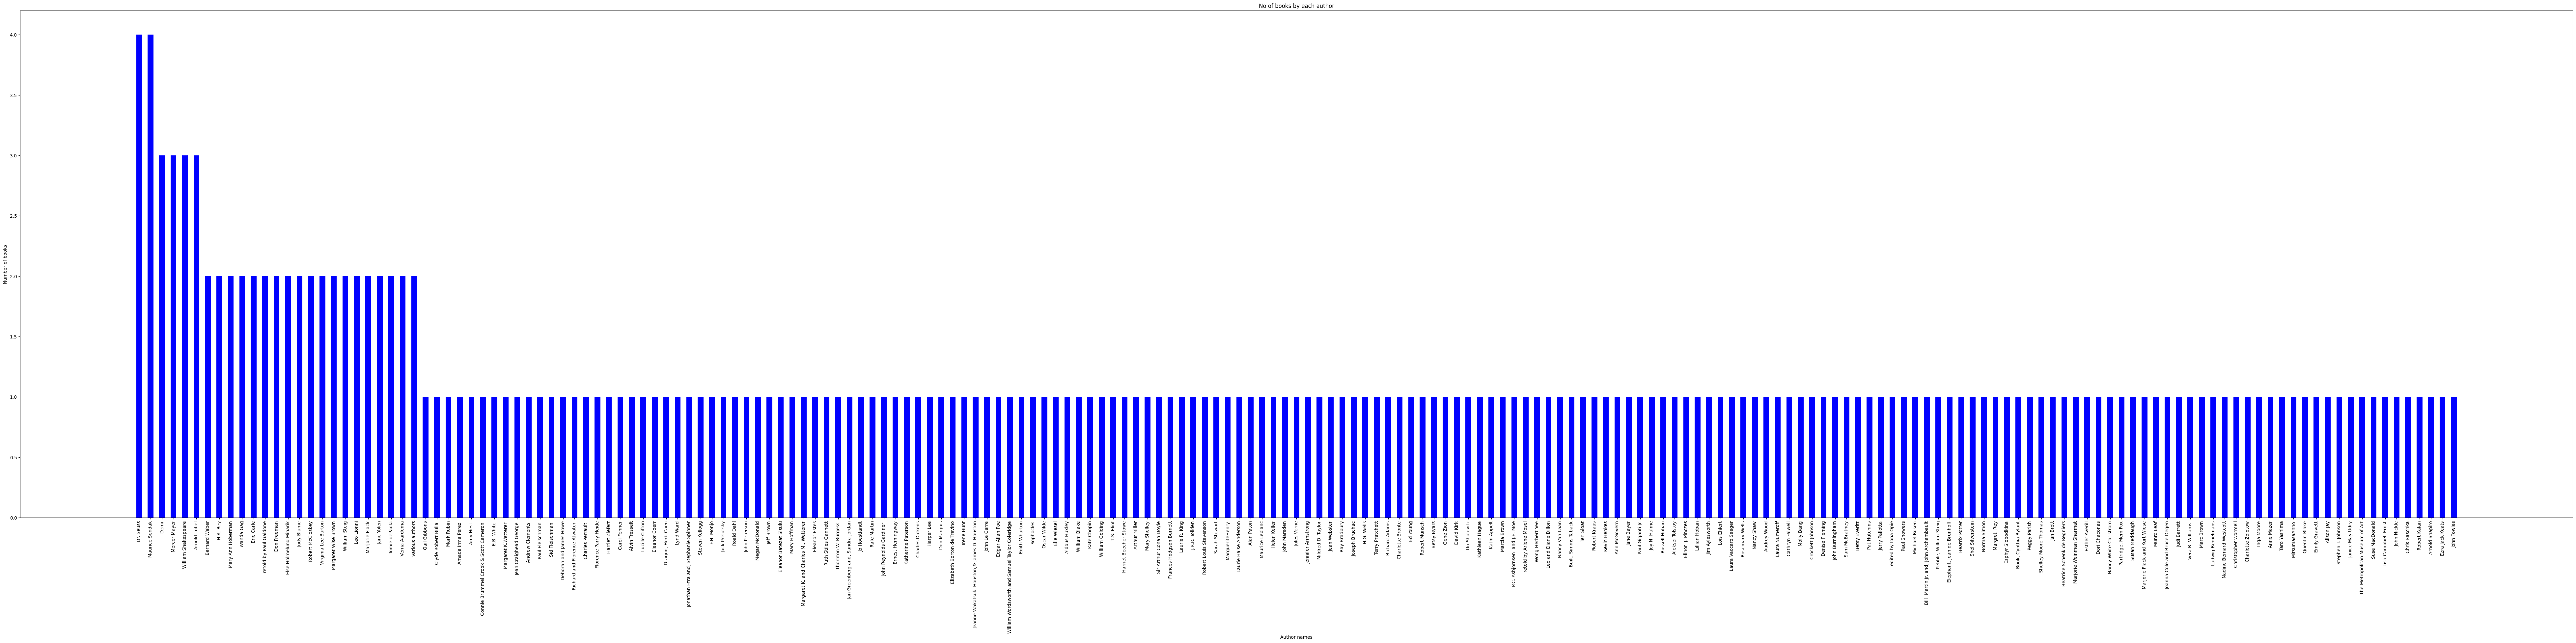

In [ ]:
#How many books does each author own
x_authors=book_data['Author'].value_counts().axes[0]
y_authors=book_data['Author'].value_counts()
fig = plt.figure(figsize = (100, 20))
plt.bar(x_authors,y_authors, color="blue", width=0.5)
plt.xlabel("Author names")
plt.ylabel("Number of books")
plt.title("No of books by each author")
plt.xticks(rotation = 90)
plt.show()
#Please zoom the screen to see clearly

**About the Language Level column**

lets see the count of each language level

In [ ]:
book_data['Language Level'].value_counts()

level_6a    28
level_5a    28
level_4a    20
level_3a    20
level_A1    15
level_A2    15
level_B1    15
level_B2    15
level_C1    15
level_C2    15
level_H     15
level_I     15
level_K     10
level_L     10
Name: Language Level, dtype: int64

From above data we can tell that how many books having csertain level of language

Lets visualize the above data

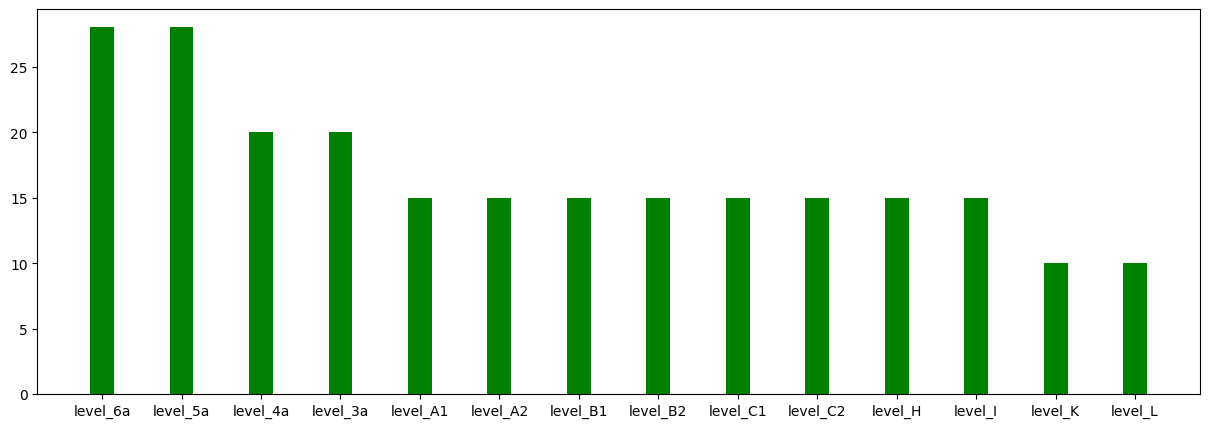

In [ ]:
#How man books does each level is having
x_levels=book_data['Language Level'].value_counts().axes[0]
y_levels=book_data['Language Level'].value_counts()
fig = plt.figure(figsize = (15, 5))
plt.bar(x_levels,y_levels,width=0.3,color='green')
plt.show()

---->now lets see the which author having highest number books in each level

In [ ]:
levels=book_data['Language Level'].unique().tolist()
level_authors=[]
for i in levels:
  levels_data=book_data[book_data['Language Level'] == i]
  print(i,"-->",levels_data['Author'].value_counts().head(1).axes[0].values[0])
  level_authors.append(levels_data['Author'].value_counts().head(1).axes[0].values[0])
  print("---------------")

level_6a --> Maurice Sendak
---------------
level_5a --> Betsy Everitt
---------------
level_4a --> retold by Paul Galdone
---------------
level_3a --> Jane Bayer
---------------
level_A1 --> Leo Lionni
---------------
level_A2 --> Beatrice Schenk de Regniers
---------------
level_B1 --> H.A. Rey
---------------
level_B2 --> Judy Blume
---------------
level_C1 --> Jane Yolen
---------------
level_C2 --> Demi
---------------
level_H --> Katherine Paterson
---------------
level_I --> Ray Bradbury
---------------
level_K --> William Shakespeare
---------------
level_L --> Various authors
---------------


Lets visualize above data

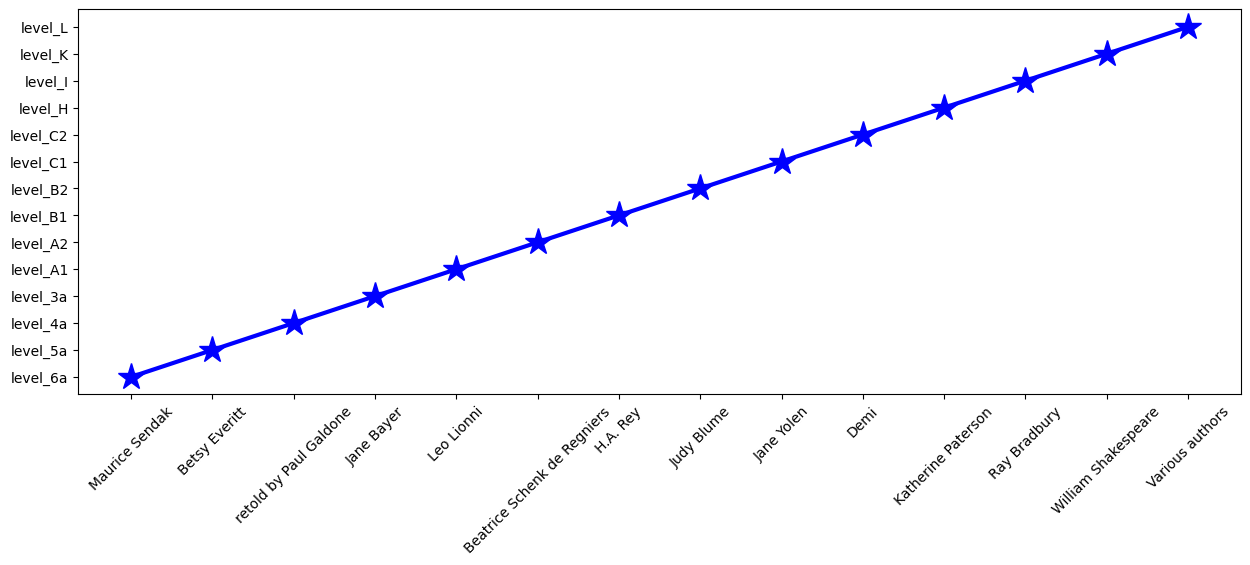

In [ ]:
#Which author having highest number of books in each level
fig = plt.figure(figsize = (15, 5))
plt.plot(level_authors,levels, color="blue", marker="*", linewidth=3.0, markersize=20)
plt.xticks(rotation = 45)
plt.show()

----> ok now lets see the pie chart of the Language levels

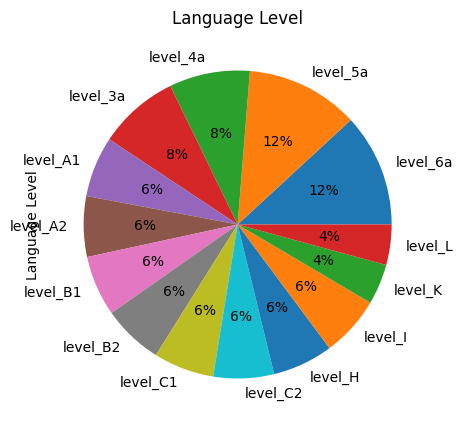

In [ ]:
book_data["Language Level"].value_counts().plot.pie(figsize = (5, 5),
                                             autopct = '%1.0f%%')
plt.title("Language Level")
plt.xticks(rotation = 90)
plt.show()